<a href="https://colab.research.google.com/github/durnav/Ml-lab-exp/blob/main/LWLR_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#Get values for x using linspace
X=np.linspace(2,10,50)
#print the values for x
print(X)
#Get values for y as sin(x)
Y=np.sin(X)
#print the value of y
print(Y)

[ 2.          2.16326531  2.32653061  2.48979592  2.65306122  2.81632653
  2.97959184  3.14285714  3.30612245  3.46938776  3.63265306  3.79591837
  3.95918367  4.12244898  4.28571429  4.44897959  4.6122449   4.7755102
  4.93877551  5.10204082  5.26530612  5.42857143  5.59183673  5.75510204
  5.91836735  6.08163265  6.24489796  6.40816327  6.57142857  6.73469388
  6.89795918  7.06122449  7.2244898   7.3877551   7.55102041  7.71428571
  7.87755102  8.04081633  8.20408163  8.36734694  8.53061224  8.69387755
  8.85714286  9.02040816  9.18367347  9.34693878  9.51020408  9.67346939
  9.83673469 10.        ]
[ 0.90929743  0.8295645   0.72776815  0.60661578  0.46932961  0.31956097
  0.16129315 -0.00126449 -0.16378849 -0.32195632 -0.47156126 -0.60862436
 -0.72950025 -0.83097406 -0.91034694 -0.96550788 -0.99498977 -0.99800852
 -0.97448383 -0.92504137 -0.85099614 -0.75431748 -0.63757668 -0.50387864
 -0.35677924 -0.2001908  -0.03827799  0.12465286  0.2842684   0.43632343
  0.57677382  0.7018841   

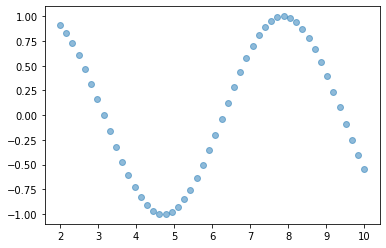

In [ ]:
#scatter plot X and Y 
plt.scatter(x,y,alpha=0.5)
#Use alpha for transparancy


In [ ]:
# Create a function def local_regression with 4 parameters x0,X,Y,tau
# create a array which will contain one row and any number of columns   
# create a array which will contain one column and any number of rows.
#Find xw    

# Find the radial_kernel function which will calculate our weight

# Find beta. (X.T is transform of matrix (array). Here @ represent matrix multiplication and the pinv used to invert the matrix) 

#return x0@beta

def local_regression(x0,X,Y,tau):
  x0=np.r_[1,x0]
  X =np.c_[np.ones(len(X)),X]

  xw=X.T *radial_kernal(x0,X,tau)
  beta=np.linalg.pinv(xw@X)@xw@Y
  return x0@beta


In [ ]:
# Create a function called def radial_kernelwith three parameters x0, X, tau and return the formula
import math
def  radial_kernal(x0,X,tau):
  return np.exp(np.sum((X-x0)**2,axis=1)/(-2*tau*tau))

array([ 2.        ,  2.16326531,  2.32653061,  2.48979592,  2.65306122,
        2.81632653,  2.97959184,  3.14285714,  3.30612245,  3.46938776,
        3.63265306,  3.79591837,  3.95918367,  4.12244898,  4.28571429,
        4.44897959,  4.6122449 ,  4.7755102 ,  4.93877551,  5.10204082,
        5.26530612,  5.42857143,  5.59183673,  5.75510204,  5.91836735,
        6.08163265,  6.24489796,  6.40816327,  6.57142857,  6.73469388,
        6.89795918,  7.06122449,  7.2244898 ,  7.3877551 ,  7.55102041,
        7.71428571,  7.87755102,  8.04081633,  8.20408163,  8.36734694,
        8.53061224,  8.69387755,  8.85714286,  9.02040816,  9.18367347,
        9.34693878,  9.51020408,  9.67346939,  9.83673469, 10.        ])

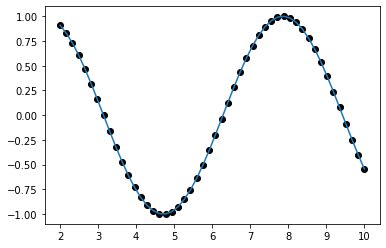

In [ ]:
#Create a function def plot_lwr(tau):
def plot_lwr(tau):
#Create a linspace with same starting and ending point of x
  L=np.linspace(2,10,50)
#Call the function local regression
  prediction=[local_regression(x0,X,Y,tau) for x0 in L]
#scatter plot X and Y 
  plt.scatter(X,Y,color="black")
#Use alpha for transparancy
  
#plt.plot(______,_______,color="red")
  plt.plot(L,prediction)
#return _____
  return L
#plot_lwr(0.01)
plot_lwr(0.01)

In [ ]:
'''x0=np.r_[1,x0]
X=np.c_[np.ones(len(X)),X]
xw=X.T *radial_kernel(x0,X,tau)
beta=np.linalg.pinv(xw@X)@xw@Y

prediction=[local_regression(x0,X,Y,tau) for x0 in domain]'''


'x0=np.r_[1,x0]\nX=np.c_[np.ones(len(X)),X]\nxw=X.T *radial_kernel(x0,X,tau)\nbeta=np.linalg.pinv(xw@X)@xw@Y\n\nprediction=[local_regression(x0,X,Y,tau) for x0 in domain]'

In [ ]:
import pandas as pd
#df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learningdatabases/housing/housing.data',header=None, sep='\s+')
df = pd.read_csv("/content/boston.csv")
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


HTTPError: ignored

In [ ]:
df.head(5)
X = df[['RM']].values # Number of Rooms
Y = df[['MEDV']].values
from math import ceil
import numpy as np
from scipy import linalg  


In [ ]:
def lowess(x, y, f= 2. / 3., iter=3):
    
    n = len(x) # Number of x  points 
    r = int(ceil(f * n))  # Computing the residual of smoothing functions 
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)] # 
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)  # Weight Function 
    w = (1 - w ** 3) ** 3  # Tricube Weight Function
    ypred = np.zeros(n) # Initialisation of predictor 
    delta = np.ones(n)  # Initialisation of delta
   
    for iteration in range(iter):
        for i in range(n):
            weights = delta * w[:, i] # Cumulative Weights 
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)]) # Matrix B
            A = np.array([[np.sum(weights), np.sum(weights * x)],
                          [np.sum(weights * x), np.sum(weights * x * x)]]) # Matrix A
                      
            beta = linalg.solve(A, b) # Beta,Solution of AX= B equation 
            ypred[i] = beta[0] + beta[1] * x[i]
             
        residuals = y - ypred   # Finding Residuals
        s = np.median(np.abs(residuals))  # Median of Residuals
        delta = np.clip(residuals / (6.0 * s), -1, 1)  # Delta
        delta = (1 - delta ** 2) ** 2   # Delta 
 
    return ypred
if __name__ == '__main__':  # Main Function




In [ ]:
import math
    n = 100  # Number of data points
   
    #Case1: Sinusoidal Fitting 
    x = X[:100].ravel()   # House Room Data for modeling 
    y = Y[:100].ravel()   # Noisy House Price data
        
    f = 0.66
    ypred = lowess(x, y, f=f, iter=3)  # Predicted House Price Data
    
    import pylab as pl
    pl.clf()
    pl.plot(x, y, label='Y NOISY')
    pl.plot(x, ypred, label='Y PREDICTED')
    pl.legend()
    pl.show()   